# Multiple Regression

imple linear regression may be used to understand and make predictions about the relationship between two variables. But what happens when there are more than two variables?

When we want to understand the relationship between a quantitative variable and two or more predictor variables, we use multiple linear regression. In multiple linear regression, the response variable must be quantitative, while the predictors may be either quantitative, categorical, or a mix of both. For example, we might ask:

* How is blood pressure associated with exercise and anxiety level?
* What is the relationship between happiness scores and income level, family size, and marital status?

We can use the following code to create a plot to explore a dataset called survey. This fictional survey data measures students’ math scores (score), hours spent studying (hours_studied), and whether they ate breakfast on test day (breakfast).

```python
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.lmplot(x='hours_studied', y='score', hue='breakfast', markers=['o', 'x'], fit_reg=False, data=survey)
plt.show()
```

Note that we set fit_reg to False here. The lmplot() function will automatically fit and plot a regression line for us unless we specify otherwise.

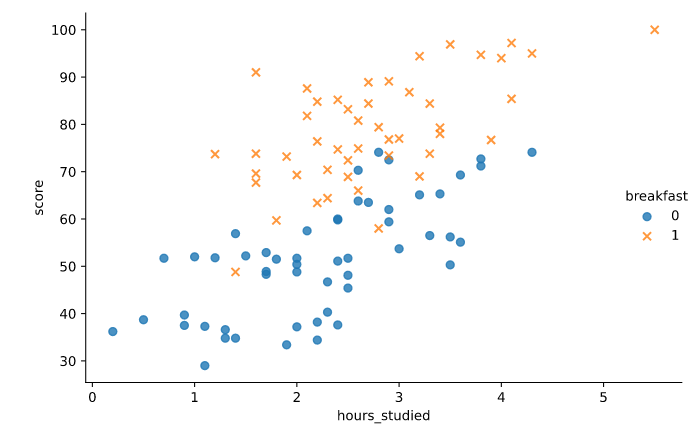

According to the plot:

1. More hours of studying seems to be associated with higher test scores.
2. The group that ate breakfast (breakfast = 1) appears to have a higher average test score than the group that didn’t (breakfast = 0).

Performing a multiple linear regression using these variables will allow us to quantify these relationships and understand whether they are likely to persist for new data.

#### Instructions
1.
A dataset called student has been loaded for you in script.py. This data has been modified from a study on the math and Portuguese achievement scores of Portuguese secondary school students.

Using sns.lmplot(), create a scatter plot of initial math scores (math1) and final Portuguese scores (port3) on the x- and y-axis, respectively, colored by students’ home address type (address). address is binary: R is for rural and U is for urban.

What is the relationship between port3 and math1? How about port3 and address?

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import codecademylib3

student = pd.read_csv('student.csv')

# Add code for scatter plot here:
sns.lmplot(x = 'math1', y = 'port3', data = student, hue = 'address', markers = ['x', 'o'], fit_reg = True)
plt.show()
```


## Multiple Regression Model Equation
We often write the equation of a line in the form y=mx+b, where m is the slope of the line and b is the y-intercept. Since we will be adding at least two predictors to a multiple regression equation, it is helpful to modify our ordering and notation of this equation:

* First, we may rewrite this equation by putting the intercept term first and the slope term second.

$y=b+mx$

Next, instead of using the names b and m, we use the names b0 and b1, respectively.

​$y = b0 + b1x1$
 
* Notice that we’ve also changed our variable name x to x1 because it is our FIRST predictor.
We are now able to add as many predictors as we need in the form

$ y = b0 + b1x1 + b2x2 + bixi$​
 
where y is the response variable, b0 is the intercept, and bi is the coefficient on the ith predictor variable.
* The “slopes” (b1, b2, b3, etc.) on the variables in multiple regression are called ***partial regression coefficients.***

While this is the proper mathematical way to write a multiple regression equation, it is often easier to write out the equation using actual variable names. For example, if we are modeling test scores (score) based on number of hours studied (hours_studied) and another variable that indicates whether a student ate breakfast (breakfast), our multiple regression equation might look like this:

$score = b0 + b1 * hours_studied + b2 * breakfast$

Of course, after fitting our model, the intercept (b0) and coefficients (b1 and b2) could be filled in with actual numbers from the output of our regression. For instance, our final equation might have an intercept of 32.7, a coefficient of 8.5 on hours_studied, and a coefficient of 22.5 on breakfast:


$score=32.7+8.5∗hours_studied+22.5∗breakfast$


## Fitting a Multiple Regression in Python
To run a multiple linear regression in Python, we can use the function OLS.from_formula() from statsmodels.api. For example, if we want to run a regression to predict score using hours_studied and breakfast (contained in a dataset named survey), we can fit the model as follows:
```python
import statsmodels.api as sm
model = sm.OLS.from_formula('score ~ hours_studied + breakfast', data=survey).fit()
```

To actually view the results, we can print a summary of them to the console using the following code.

```python
print(model.summary())
```

Rather than printing the entire summary table, we can call the model coefficients directly using model.params. We can even call a specific coefficient by order of appearance in the table. For instance:

```python
print(model.params)
# Output:
# Intercept        32.665570
# hours_studied     8.540499
# breakfast        22.495615
 
print(model.params[0])
# Output:
# 32.66556979549575
```

From the coefficient table, we can see the intercept is approximately 32.7, the coefficient on hours_studied is 8.5, and the coefficient on breakfast is 22.5.

#### Instructions
1.
Using the student dataset, fit a multiple regression model for the response variable port3 with quantitative predictor math1 and binary predictor address. Save the results as model1.

Checkpoint 2 Passed

Stuck? Get a hint
2.
Print the intercept and coefficients from model1 using .params. Are they listed in the order you thought they’d be?

Checkpoint 3 Passed

Stuck? Get a hint
3.
Using model1.params, save the intercept as b0, the coefficient for math1 as b1, and the coefficient for address as b2. If we added students’ first semester Portuguese score (port1) as another predictor to the model, what index would it be in model1.params?

```python
import pandas as pd
import statsmodels.api as sm

student = pd.read_csv('student.csv')

# Fit regression model here:
model1 = sm.OLS.from_formula('port3 ~ math1 + address', data = student).fit()

# Print intercept and coefficients here:
print(model1.params)

# Save intercept and coefficients here:
b0 = model1.params[0]
b1 = model1.params[2]
b2 = model1.params[1]

Output:
123456789101112131415
import pandas as pd
import statsmodels.api as sm

student = pd.read_csv('student.csv')

# Fit regression model here:
model1 = sm.OLS.from_formula('port3 ~ math1 + address', data = student).fit()

# Print intercept and coefficients here:
print(model1.params)

# Save intercept and coefficients here:
b0 = model1.params[0]
b1 = model1.params[2]
b2 = model1.params[1]
Run


Output:
Intercept       3.234071
address[T.U]    0.557631
math1           0.475892
dtype: float64
```





## Binary Categorical Variables in Multiple Regression
Binary categorical variables are variables with exactly two possible values. In a regression model, these two values are generally coded as 1 or 0. For example, a multiple regression equation from the survey dataset might look like this:


$score=32.7+8.5∗hours_studied+22.5∗breakfast$

breakfast is a binary categorical predictor with two possible values: “ate breakfast,” which is coded as 1 in the model and “didn’t eat breakfast,” which is coded as 0. If we substitute these values for breakfast in the regression equation, we end up with two equations: one for each group.

For breakfast eaters, we substitute 1 for breakfast and simplify:


$score=32.7+8.5∗hours_studied+22.5∗1$

$score=32.7+8.5∗hours_studied+22.5$

$score=(32.7+22.5)+8.5∗hours_studied$

$score=55.2+8.5∗hours_studied$
​
  
​
 
For the group that didn’t eat breakfast, we substitute 0 for breakfast and simplify:


$score=32.7+8.5∗hours_studied+22.5∗0$

$score=32.7+8.5∗hours_studied+0$

$score=32.7+8.5∗hours_studied$
​
  
​
 
If we inspect these two equations, we see that the only difference is the larger intercept for the group that ate breakfast (55.2) compared to the group that didn’t eat breakfast (32.7). The coefficient on hours_studied is the same for both groups.

We can visualize this regression equation by adding both lines to the scatter plot of score and hours_studied with plt.plot() as follows:
```python
import seaborn as sns
import matplotlib.pyplot as plt
 
sns.lmplot(x='hours_studied', y='score', hue='breakfast', markers=['o', 'x'], fit_reg=False, data=survey)
plt.plot(survey.hours_studied, 32.7+8.5*survey.hours_studied, color='blue',linewidth=5)
plt.plot(survey.hours_studied, 55.2+8.5*survey.hours_studied, color='orange',linewidth=5)
plt.show()
```

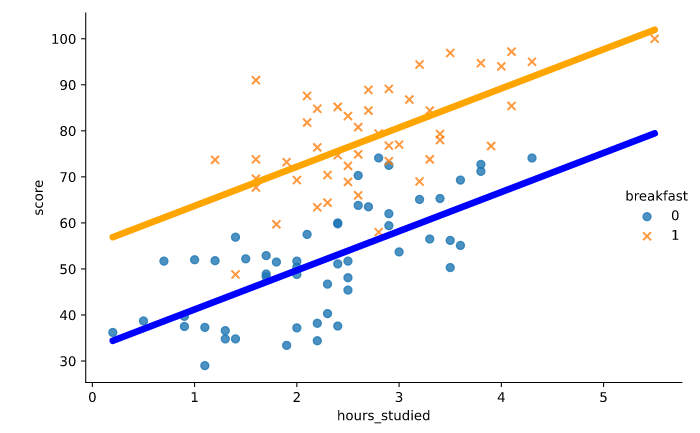

From the plot, we can see the regression lines have the same slope. The orange line for the breakfast-eaters starts higher, but increases at the same rate as the blue line for the group that didn’t eat breakfast.

#### Instructions
1.
Code has been provided for you in script.py to fit a regression model predicting port3 based on math1 and address. The fitted model has been saved as model1. Use .params to print the intercept and coefficients from the results and inspect the coefficient for address.

Checkpoint 2 Passed

Stuck? Get a hint
2.
The variable address has two values: R for rural (coded as address = 0 in the model) and U for urban (coded as address = 1). Because we’ve included this binary variable in our model, we’ve actually fit two separate regression lines: one for students who live at a rural address, and one for students who live at an urban address.

Using the output from the model, write out the regression equation for when address is equal to R and save the value of the intercept as interceptR. Then, write out the regression equation for when address is equal to U and save the value of the intercept as interceptU. Finally, since the slope on math1 will be the same for both equations, save this value as slope. Round all final values to one decimal place (i.e., the tenth’s place).

Checkpoint 3 Passed

Stuck? Get a hint
3.
The code for the scatter plot of port3 and math1 has been provided for you in script.py. Using the regression equations you created in the last checkpoint, add a blue line to the scatter plot for rural addresses.

Checkpoint 4 Passed

Stuck? Get a hint
4.
Using the regression equations with rounded values that you created in the second step, add an orange line to the scatter plot for urban addresses. What’s similar about the two lines you just plotted? What’s different?

```python
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import codecademylib3

student = pd.read_csv('student.csv')

model1 = sm.OLS.from_formula('port3 ~ math1 + address', data=student).fit()

# Print model results here:
print(model1.params)

# Save intercepts and slope here:
Intercept = model1.params[0]
math_slope = model1.params[2]
address_slope = model1.params[1]

interceptR = (Intercept).round(1)
interceptU = (Intercept + address_slope).round(1)
slope = 0.5

# Add lines to complete scatter plot and display
sns.lmplot(x='math1', y='port3', hue='address', markers=['o', 'x'], fit_reg=False, data=student)
# Line for rural addresses (R)
plt.plot(student.math1, interceptR +  slope*student.math1,color = 'blue', linewidth = 5)
# Line for urban addresses (U)
plt.plot(student.math1, interceptU +  slope*student.math1,color = 'orange', linewidth = 5)
plt.show()


Output:
Intercept       3.234071
address[T.U]    0.557631
math1           0.475892
dtype: float64
```

#### Instructions
1.
Suppose that we fit a model to predict port3 (final Portuguese score) with predictors math1 (first semester math score) and address (urban or rural residence). The coefficients are printed below.
```python
# Output:
# Intercept       3.234071
# address[T.U]    0.557631
# math1           0.475892
```
In the file interpretations.txt write a one-sentence interpretation for the intercept. Does this interpretation make practical sense?

Checkpoint 2 Passed

Hint
The intercept doesn’t always make practical sense, but can always be interpreted in terms of the equation. It is the expected value of the outcome variable when all the predictors are equal to zero.

2.
Add a one-sentence interpretation to interpretations.txt for the coefficient on address in terms of the average Portuguese scores (port3) of students from rural areas (R or address = 0) and students from urban areas (U or address = 1). Check your solution against the sample solutions in solutions.txt.

```python
# Interpretation of the intercept
For students from rural areas whose first math scores were equal to zero, the average final Portuguese score was 3.23.

# Interpretation of the coefficient on address
On average, students from urban areas scored 0.56 points higher on their final Portuguese scores than did students from rural areas, holding all other variables constant (in this case: holding math1 scores constant).
###



## Quantitative Variables in Multiple Regression
In the previous exercises, we looked at regression models with one quantitative predictor and one binary predictor, but we can also have models with multiple quantitative predictors. For example, consider the following model using the survey dataset (assignments is the number of homework assignments the student has completed):
```python
import statsmodels.api as sm
model = sm.OLS.from_formula('score ~ hours_studied + assignments', data=survey).fit()
print(model.params)
 
# Output:
# Intercept        16.676498
# hours_studied     6.273886
# assignments       4.687796
```
From the coefficients above, our regression equation is:


$score=16.7+6.3∗hours_studied+4.7∗assignments$

We can still think of multiple regression as creating a new regression line for each value of a quantitative predictor. However, it is challenging to visualize this because we now have different regression lines for every possible value of assignments. To visualize the regression output, it is helpful to choose a few sample values: for example, 1, 5, and 10 assignments.

We can add these lines to our scatter plot of score vs. hours_studied as before:
```python
import seaborn as sns
import matplotlib.pyplot as plt
 
# Create scatter plot of hours_studied and score
sns.lmplot(x='hours_studied', y='score', hue='assignments', palette='Blues', fit_reg=False, data=survey)
```

This time we will directly put the model coefficients into each regression equation by calling them individually from model.params. The code for 1, 5, and 10 assignments is given below.
```python
# Add regression line for 1 assignment
plt.plot(survey.hours_studied, model.params[0] + model.params[1]*survey.hours_studied + model.params[2]*1, color='lightblue',linewidth=5)
 
# Add regression line for 5 assignments
plt.plot(survey.hours_studied, model.params[0] + model.params[1]*survey.hours_studied + model.params[2]*5, color='blue',linewidth=5)
 
# Add regression line for 10 assignments
plt.plot(survey.hours_studied, model.params[0] + model.params[1]*survey.hours_studied + model.params[2]*10, color='darkblue',linewidth=5)
 
# Show plot with legend
plt.legend(['assignments=1','assignments=5', 'assignments=10'])
plt.show()
```

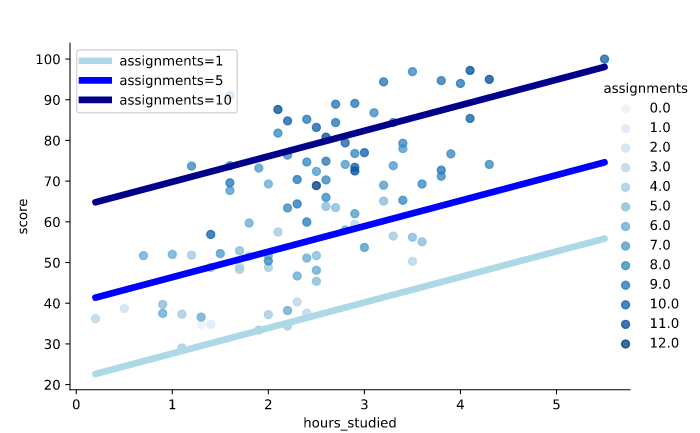

We can see in the plot that the slopes of all three lines are the same, but the intercepts differ. As the number of completed assignments increases, the intercept of the corresponding regression line also increases.

## Interpretation of Quantitative Variables
In a multiple regression model, the coefficient on a quantitative predictor is the expected difference in the outcome variable for a one-unit increase of the predictor, holding all other predictors constant.

For the survey dataset, the multiple regression equation is:

*score=16.7+6.3∗hours_studied+4.7∗assignments*

The predictor assignments is a quantitative variable. Let’s substitute a few different values for assignments into the regression equation to see how it changes:

For students who completed 0 assignments:

*score=16.7+6.3∗hours_studied+4.7∗0*

*score=16.7+6.3∗hours_studied*
​
 
For students who completed 1 assignment:

*score=16.7+6.3∗hours_studied+4.7∗1*

*score=21.4+6.3∗hours_studied*
​
 
For students who completed 2 assignments:

*score=16.7+6.3∗hours_studied+4.7∗2*

*score=26.1+6.3∗hours_studied*
​
 
The only difference between the equations is that we add 4.7 points to the intercept for each additional completed assignment. Thus, among students who studied the same number of hours (i.e., holding all other variables constant), students who completed one more assignment earned a 4.7 point higher test score on average.

#### Instructions
1.
Suppose that we ran a model predicting Portuguese score (port3) based on first math score (math1) and first Portuguese score (port1). The code and coefficients are shown below:
```python
import statsmodels.api as sm
model2 = sm.OLS.from_formula('port3 ~ math1 + port1', data=student).fit()
print(model2.params)
# Output:
# Intercept    0.440159
# math1        0.111161
# port1        0.860927
```
In the file interpretations.txt write a one-sentence interpretation for the intercept. What does this value represent in the context of the dataset?

Checkpoint 2 Passed

Stuck? Get a hint
2.
In interpretations.txt, add a one-sentence interpretation for the coefficient on math1 and another for the coefficient on port1. Check the sample solutions in the file solutions.txt and compare them to your own.


Stuck? Get a hint
3.
In interpretations.txt, add a one-sentence interpretation for the coefficient on port1 and another for the coefficient on port1. Check the sample solutions in the file solutions.txt and compare them to your own. Why is it important to hold the other predictors constant in our interpretation of a coefficient?
```python
# One-sentence interpretation of the intercept:
When students have a value of zero for both first math and first Portuguese score, their average final Portuguese score is 0.44.

# One-sentence interpretation of the coefficient on math1:
Holding first Portuguese score constant, for every additional point on first math score, final Portuguese score increases by 0.11 points.

# One-sentence interpretation of the coefficient on port1:
Holding first math score constant, for every additional point on first Portuguese score, final Portuguese score increases by 0.86 points.
```

## Changes in Predictor Coefficients
Sometimes we use regression to understand the relationship between two variables because we wish to control for potential confounders. For example, based on the survey dataset, we may be primarily interested in how studying (hours_studied) is related to test score (score); however, in order to understand this relationship, we may want to control for additional student attributes, such as whether the student ate breakfast (breakfast).

If we perform a simple linear regression predicting score from hours_studied, we get the following results:
```python
import statsmodels.api as sm
model0 = sm.OLS.from_formula('score ~ hours_studied', data=survey).fit()
print(model0.params)
 
# Output:
# Intercept        34.990700
# hours_studied    11.881045
```

However, if we add breakfast to the model and inspect the new coefficients, we’ll find that the intercept and slope on hours_studied have changed:
```python
import statsmodels.api as sm
model1 = sm.OLS.from_formula('score ~ hours_studied + breakfast', data=survey).fit()
print(model1.params)
 
# Output:
# Intercept        32.665570
# hours_studied     8.540499
# breakfast        22.495615
```

Note that the coefficient on hours_studied changes from 11.9 to 8.5. Why does this happen? Perhaps people who eat breakfast are more likely to study longer and also more likely to score better on their exam. Without taking breakfast into account, some of the relationship between score and breakfast is attributed to hours_studied instead.

#### Instructions
1.
The student dataset has been loaded for you in script.py. Run a regression model predicting final Portuguese score (port3) from first math score (math1). Save the fitted model as simple.

Checkpoint 2 Passed

Stuck? Get a hint
2.
Now fit a multiple regression model predicting final Portuguese scores (port3) from first math score (math1) AND first Portuguese score (port1). Save the fitted model as multiple.

Checkpoint 3 Passed

Stuck? Get a hint
3.
Print the resulting intercept and coefficients from the simple model using .params. What is the apparent relationship between final Portuguese score and first math score?

Checkpoint 4 Passed

Stuck? Get a hint
4.
Print the resulting coefficients from the multiple model using .params. How did the coefficient on math1 change when port1 was added to the model?
```python
import pandas as pd
import statsmodels.api as sm

student = pd.read_csv('student.csv')

# Run regression with only math1 here:
simple = sm.OLS.from_formula('port3 ~ math1', data = student).fit()
# Run regression with math1 and port1 here:
multiple = sm.OLS.from_formula('port3~math1 + port1', data = student).fit()
# Print the results of simple here:
print(simple.params)
# Print the results of multiple here:
print(multiple.params)


Output:
Intercept    3.627031
math1        0.484442
dtype: float64
Intercept    0.440159
math1        0.111161
port1        0.860927
dtype: float64
```

## Simpson's Paradox
In the last exercise, we explored how a coefficient may change when additional predictors are added to a model. When adding predictors entirely reverses the sign of the coefficient, this is called Simpson’s Paradox: one model says the direction of the relationship is positive, while the other says it is negative.

Let’s look at a simple example of this with the fictional dataset tv. We’ll start by fitting a simple regression predicting weekly hours of television watched (tv_hours) from the number of books in the home (books).
```python
import statsmodels.api as sm
model0 = sm.OLS.from_formula('tv_hours ~ books', data=tv).fit()
print(model0.params)
# Output:
# Intercept    12.219967
# books         0.089078
```
The coefficient on books is positive: the model indicates that more books is associated with more weekly hours of television. Now, let’s add a categorical variable to the model that specifies type of home (hometype): rented room, one-bedroom apartment, two-bedroom apartment, or house.

```python
import statsmodels.api as sm
model1 = sm.OLS.from_formula('tv_hours ~ books + hometype', data=tv).fit()
print(model1.params)
# Output
# Intercept            22.952692
# hometype[T.2BR]      11.754848
# hometype[T.house]     5.878007
# hometype[T.room]     -5.880337
# books                -0.093223
```

This model leads to the opposite conclusion: the negative coefficient on books indicates that more books is associated with FEWER hours of television watched. How is this possible?

Let’s look at a scatter plot of tv_hours (y-axis) against books (x-axis) colored by hometype. This time we’ll allow lmplot to fit regression lines for each type of home by NOT setting fit_reg to False. We’ll also add the regression line for model0, which only has books as a predictor.
```
import seaborn as sns
import matplotlib.pyplot as plt
 
# Scatter plot
sns.lmplot(x='books', y='tv_hours', hue='hometype', palette='colorblind', markers=['o', 'x', 'v','s'], ci=False, legend=False, data=tv)
 
# Black line
plt.plot(tv.books, model0.params[0] + model0.params[1]*tv.books, color='black', linewidth=3, label='Only Books')
 
plt.legend()
plt.show()
```
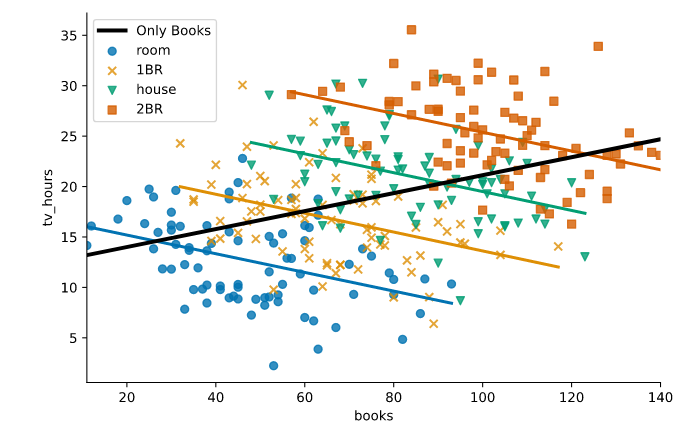

Scatter plot showing books on the x-axis and tv hours on the y-axis. Regression lines for each group of home-type show a negative relationship between tv hours and books. Meanwhile, the regression line for the model with just books shows a positive relationship.

Broadly, the points slope upward (black line), but the points slope downward within each hometype group (colored lines).

This could be because bigger homes mean more room for a larger book collection. Or maybe certain home types are associated with higher incomes, so people have more time and money for television. We can examine the pattern of association from the model, and possibly make good predictions from new data with it, but we can’t find out the cause from this type of analysis.

#### Instructions
1.
The dataset sat has been loaded for you in script.py. This dataset examines U.S. school expenditures and SAT scores by states from the 1994-1995 school year and includes the following variables:

total, average total of math and verbal scores on the SAT
expend, average expenditure per pupil in thousands of dollars
takingR, percentage of eligible students taking the SAT (we rounded this to the nearest 5 to simplify plotting)
In script.py we’ve provided code to fit a linear regression model of average total SAT score predicted from average expenditure per pupil. The fitted model is saved as model0. Print the regression coefficients from model0 and inspect them.

What is the relationship between SAT score and expenditure per pupil? Is this what you expected?

Checkpoint 2 Passed

Stuck? Get a hint
2.
Now fit the same model but with takingR as an additional predictor and save the fitted model as model1.

Checkpoint 3 Passed

Stuck? Get a hint
3.
Print the coefficients of model1 using .params and inspect the coefficient on expend. How does it differ from the coefficient in model0? What does this model say about the relationship between average expenditure and SAT scores?

Checkpoint 4 Passed

Stuck? Get a hint
4.
We have provided code in script.py to generate a scatter plot with expend on the x-axis and total on the y-axis. The points are colored by takingR, and we’ve plotted regression lines for each value of takingR.

Add a line to the plot that shows the regression line for model0 in black. Be sure to call the model coefficients directly from the output of step 1.

Not taking into account the percentage of students taking the test, how does the broad pattern of points reflect the results of model0? How do the regression lines within each group reflect the results of model1?

```python
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import codecademylib3

sat = pd.read_csv('sat.csv')
model0 = sm.OLS.from_formula('total ~ expend', data=sat).fit()

# Print simple regression coefficients:
print(model0.params)

# Run regression with takingR added:
model1 = sm.OLS.from_formula('total ~ expend + takingR', data = sat).fit()

# Print multiple regression coefficients:
print(model1.params)

# Code for scatter plot:
sns.lmplot(x='expend', y='total', hue='takingR', palette='colorblind', ci=None, data=sat)
# Add regression line for model0 here:
plt.plot(sat.expend, model0.params[0] + model0.params[1]*sat.expend, color = 'black', linewidth = 3, label = 'Expend')

plt.show()

Output:
Intercept    1089.293718
expend        -20.892174
dtype: float64
Intercept    996.329849
expend        11.737303
takingR       -2.809061
dtype: float64
```


## Assumptions of Multiple Regression
When doing any type of statistical analysis, we should always keep the assumptions in mind. Multiple linear regression requires some of the same assumptions as simple linear regression:

1. Linear functional form, which can be assessed by plotting the outcome variable against the predictor variable and looking for a linear relationship
2. Normality, which can be assessed by plotting a histogram of the residuals and looking for an approximately normal distribution
3. Homoscedasticity, which can be assessed by plotting residuals against fitted values and confirming that there is no clear pattern

4. In addition, we also have to check that the predictors are not linearly related. This is referred to as multicollinearity and can lead to misleading results.

We can detect multicollinearity by checking the correlations between pairs of variables in our data. Correlations close to 1 or -1 may be considered too closely related to both be included in a model. The following code calculates the correlation pairs from dataset df and saves them as corr_grid.

```python
corr_grid = df.corr()
```

For easy visual detection, we can use Python’s heatmap() function from seaborn to create a heat map of correlations between quantitative variables in a dataset. The code to produce a heat map from corr_grid is shown below.

```python
sns.heatmap(corr_grid, xticklabels=corr_grid.columns, yticklabels=corr_grid.columns, vmin=-1, center=0, vmax=1, cmap='PuOr', annot=True)
plt.show()
```

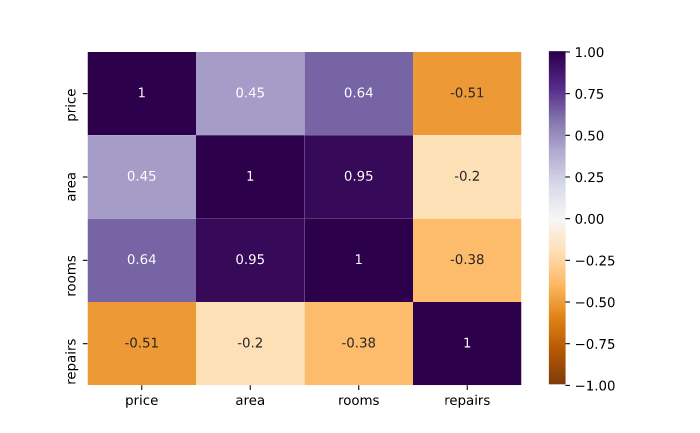


Plot showing grid of paired correlations from -1 to 1 for variables price, area, rooms, and repairs. Higher absolute correlations are darker.

The heat map above is particularly dark purple (near 1) for the area and rooms variables, indicating a strong linear relationship (corr = 0.95). If we were running a multiple regression to predict price, we might decide to keep only one of those two variables in order to avoid multicollinearity.